# Chord Length

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import draw
from scipy import ndimage


%load_ext autoreload
%autoreload 2

<ipython-input-3-a9560c439e7c>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  binary = draw.simulate_binary_3d(image, pos, radius)


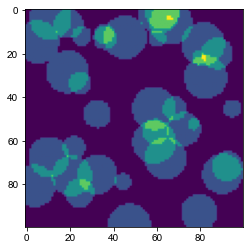

In [3]:
image = np.zeros((100, 100, 100), dtype=np.uint8)
pos = np.random.uniform(0, 100, (3, 200))
radius = 10
width = 100

binary = draw.simulate_binary_3d(image, pos, radius)

plt.imshow(binary[20])
plt.show()

In [4]:
def get_PORE_START_IDs(slice_1d):
    """
    Determines the location of interfaces in a binary 1D array.
    Args:
         slice_1d (array): a 1D slice from the main binary image.
    """
    startIDs = []
    for i, cell in enumerate(slice_1d[:-1]):
        if cell == 1 and slice_1d[i+1] == 0:
            startIDs.append(i+1)
    return startIDs


def get_CHORDS_1D(slice_1d):
    """
    Measures chords in a 1D slice, based on the locations determined
    by get_PORE_START_IDs.
    Args:
         slice_1d (array): a 1D slice from the main binary image.
    """
    pbc_L = 0
    if slice_1d[0] == 0:
        pbc_L = get_PBC_L(slice_1d)
    
    startIDs = get_PORE_START_IDs(slice_1d)
    
    for chordStart in startIDs:
        chord_L = 0
        in_pore = True
        while in_pore:
            if chordStart + chord_L < len(slice_1d):
                if slice_1d[chordStart + chord_L] == 0:
                    chord_L +=1
                else:
                    in_pore = False
            else:
                chord_L += pbc_L
                in_pore = False
        chords.append(chord_L)
        
def get_PBC_L(slice_1d):
    """
    Takes into account periodic boundary conditions.
    """
    pbc_L = 0
    in_pore = True
    while in_pore:
        if slice_1d[pbc_L] == 0:
            pbc_L +=1
        else:
            in_pore = False 
    return pbc_L

def measureChords(binary):
    """
    Measures chords in the binary image.
    Args: 
         binary (ndarry)
    """

    for j in range(len(binary[:])):
        for i in range(width):
            # X
            slice_1D = binary[j][:,i]
            if sum(slice_1D) != 0:
                get_CHORDS_1D(slice_1D)

            # Y
            slice_1D = binary[j][i,:]
            if sum(slice_1D) != 0:
                get_CHORDS_1D(slice_1D)

            # Z
            slice_1D = binary[:][i,j]
            if sum(slice_1D) != 0:
                get_CHORDS_1D(slice_1D)
    return chords

70565


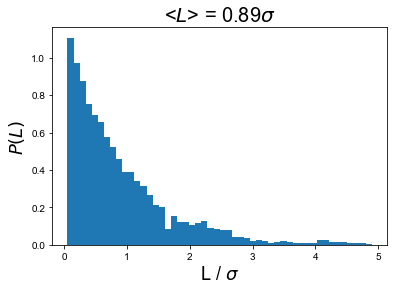

In [7]:
chords = []
chords = measureChords(binary)
print(len(chords))

scaled_chords = np.array(chords)/(radius*2)
plt.hist(scaled_chords, bins=50, density = True)

#plt.ylim(0,0.1)

plt.ylabel(r'$P(L)$', size = 18)
plt.xlabel(r'L / $\sigma$', size = 18)
plt.title( r'<$L$> = ' + f'{np.mean(scaled_chords):.2f}' + r'$\sigma$', size = 20)
plt.show()